In [ ]:
#Data Source: PDFs parsed from https://coststudies.ucdavis.edu/current/commodities

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('UCD-data.csv')
df['true?'] = ((df['Labor Cost'] + df['Fuel'] + df['Lube & Repairs'] + df['Material Cost'] + df['Custom/Rent']) - df['Total Cost'])<2
filtered_df = df[df['true?'] == True]
filtered_df.to_csv('check.csv')

In [3]:
times_df = filtered_df.groupby("Product", as_index=False)["Time (Hrs./Ac)"].mean()

/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_47246/2051888399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product", y="Time (Hrs./Ac)", data=times_df, palette="viridis")


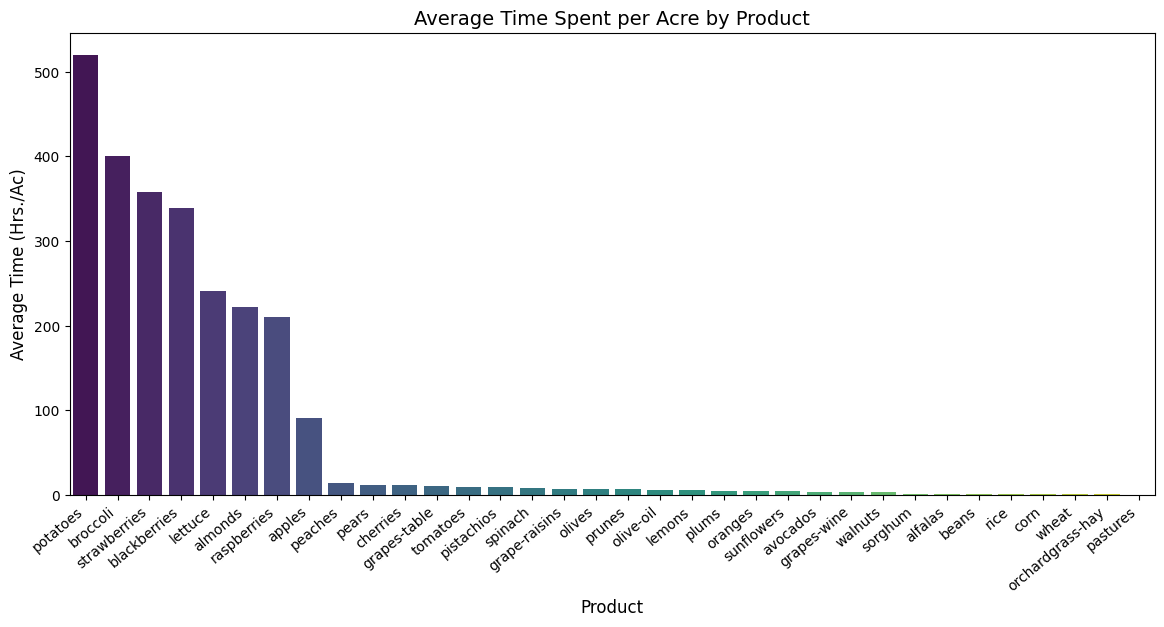

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

times_df = times_df.sort_values(by="Time (Hrs./Ac)", ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x="Product", y="Time (Hrs./Ac)", data=times_df, palette="viridis")

plt.xlabel("Product", fontsize=12)
plt.ylabel("Average Time (Hrs./Ac)", fontsize=12)
plt.title("Average Time Spent per Acre by Product", fontsize=14)
plt.xticks(rotation=40, ha="right")  

plt.show()

In [5]:
cost_df = filtered_df.groupby("Product", as_index=False)[["Labor Cost", "Total Cost"]].sum()


In [6]:
cost_df

,Product,Labor Cost,Total Cost
0,alfalas,837.00,5961.00
1,almonds,2104.00,12308.00
2,apples,4440.00,7060.00
3,avocados,1863.00,10018.00
4,beans,569.22,2886.88
5,blackberries,28945.00,62179.00
6,broccoli,3942.00,14200.00
7,cherries,1273.00,2967.00
8,corn,409.00,2285.00
9,grape-raisins,2480.00,3646.00


/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_47246/2393409953.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Product", y="Ratio", data=cost_df, palette="coolwarm")


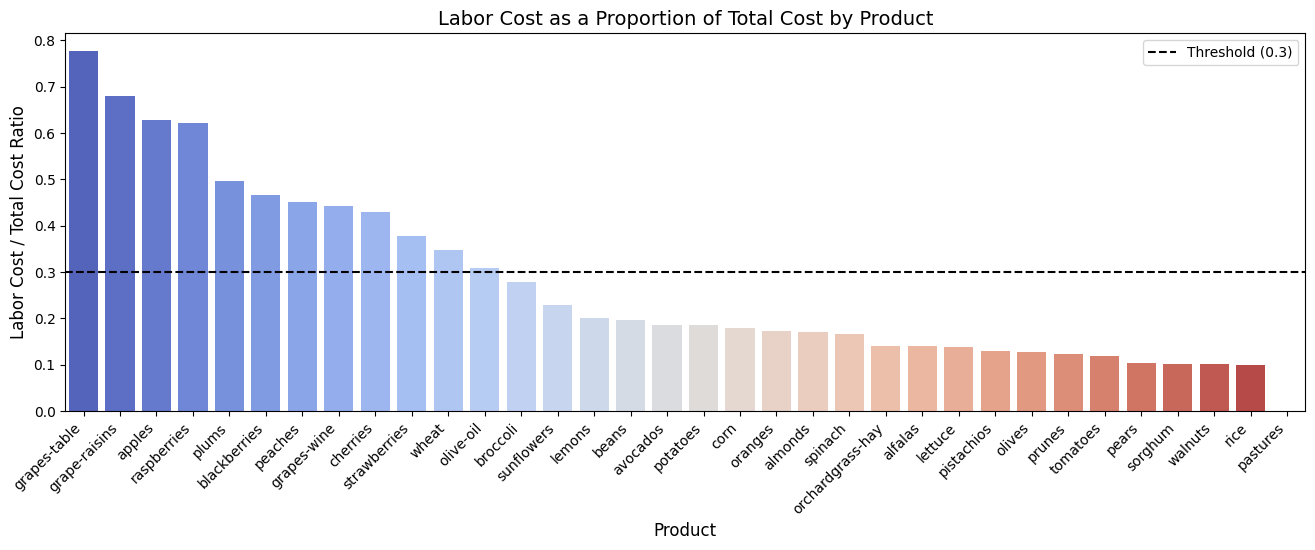

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

cost_df["Ratio"] = cost_df["Labor Cost"] / cost_df["Total Cost"]
cost_df = cost_df.sort_values(by="Ratio", ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Product", y="Ratio", data=cost_df, palette="coolwarm")
plt.axhline(y=0.3, color='black', linestyle='dashed', linewidth=1.5, label="Threshold (0.3)")
plt.xticks(rotation=45, ha="right", fontsize=10)  
plt.subplots_adjust(bottom=0.25)  

plt.xlabel("Product", fontsize=12)
plt.ylabel("Labor Cost / Total Cost Ratio", fontsize=12)
plt.title("Labor Cost as a Proportion of Total Cost by Product", fontsize=14)
plt.legend()

plt.show()

In [8]:
cost_df
#come up with weighted score, including acrage per crop and stuff. production per state? indicators for labor intensiveness

#look into social deprivation index

#https://www.graham-center.org/maps-data-tools/social-deprivation-index.html
"""
https://www.graham-center.org/maps-data-tools/social-deprivation-index.html
    take a bunch of data (like %undereducated, % of ppl living in bad housing, unemployed%), normalize it
    Apply factor analysis (dimension reducing technique, look for latent variance between variables)
    factor analysis basically report a weight of importance, which we multiply with z score to find fianl
    


The idea is that
social deprivation -> undereducation, bad housing, enemployment, etc
    
However, social deprivation is more abstraction of an index, cannot be measured

So we look at quantifiable values we believe is associated with it

? -> undereducation, bad housing, enemployment, etc
Then we work backwards to find social deprivation


So something similar with this?

labor intensivity -> ratio of labor to machine/total cost, number of workers, worker compensation, workers per acre



then we work backwards

How could we apply this to farm labor?
    1. find variables associated with manual labor (assuming the latent)
    
#how labor intensive a states labor intensivity is?

ratio of cost: calculate with acrage of various crops per state
    
    
    
"""

'\nhttps://www.graham-center.org/maps-data-tools/social-deprivation-index.html\n    take a bunch of data (like %undereducated, % of ppl living in bad housing, unemployed%), normalize it\n    Apply factor analysis (dimension reducing technique, look for latent variance between variables)\n    factor analysis basically report a weight of importance, which we multiply with z score to find fianl\n    \n\n\nThe idea is that\nsocial deprivation -> undereducation, bad housing, enemployment, etc\n    \nHowever, social deprivation is more abstraction of an index, cannot be measured\n\nSo we look at quantifiable values we believe is associated with it\n\n? -> undereducation, bad housing, enemployment, etc\nThen we work backwards to find social deprivation\n\n\nSo something similar with this?\n\nlabor intensivity -> ratio of labor to machine/total cost, number of workers, worker compensation, workers per acre\n\n\n\nthen we work backwards\n\nHow could we apply this to farm labor?\n    1. find var

In [9]:
#read in xiaoyu's number of workers

In [10]:
crops = pd.read_csv("../USDAstats/aggregated_crops.csv")

In [11]:
crops.columns

Index(['State', 'ALMONDS', 'APPLES', 'APRICOTS', 'ARTICHOKES', 'AVOCADOS',
       'BARLEY', 'BEANS', 'BERRIES', 'BROCCOLI', 'CABBAGE', 'CANOLA',
       'CARROTS', 'CAULIFLOWER', 'CELERY', 'CHERRIES', 'CHICKPEAS', 'CITRUS',
       'COFFEE', 'CORN', 'COTTON', 'DATES', 'EMMER & SPELT',
       'FIELD CROPS TOTALS', 'FIELD CROPSS, OTHER', 'FIGS', 'FLAXSEED',
       'FRUIT', 'GARLIC', 'GRAPES', 'HAY', 'HAZELNUTS', 'HERBS', 'HOPS',
       'LEMONS', 'LENTILS', 'LETTUCE', 'MACADAMIAS', 'MELONS', 'MILLET',
       'MINT', 'NECTARINES', 'OATS', 'OLIVES', 'ONIONS', 'ORANGES', 'PEACHES',
       'PEANUTS', 'PEARS', 'PEAS', 'PECANS', 'PEPPERS', 'PISTACHIOS', 'PLUMS',
       'POTATOES', 'PRUNES', 'RICE', 'RYE', 'SAFFLOWER', 'SORGHUM', 'SOYBEANS',
       'SPINACH', 'SQUASH', 'SUNFLOWER', 'TANGERINES', 'TOBACCO', 'TOMATOES',
       'TREE NUT', 'TRITICALE', 'VEGETABLE TOTALS', 'VEGETABLES, OTHER',
       'WALNUTS', 'WHEAT'],
      dtype='object')

In [12]:
crops = crops[['State','APPLES', 'GRAPES', 'PLUMS', 'PEACHES', 'CHERRIES', 'WHEAT', 'OLIVES', 'BROCCOLI', 'SUNFLOWER', 'LEMONS', 'BEANS', 'AVOCADOS', 'POTATOES', 'CORN', 'ORANGES','ALMONDS', 'SPINACH', 'LETTUCE', 'PISTACHIOS','PRUNES', 'TOMATOES', 'PEARS', 'SORGHUM', 'WALNUTS', 'RICE']]

In [13]:
import pandas as pd

# Assuming your DataFrame is named df
# Example: df = pd.read_csv("your_file.csv")

# Make a copy to avoid modifying original data
df_percent = crops.copy()

# Calculate row-wise total acreage (excluding 'State' column)
crop_columns = crops.columns.difference(['State'])
df_percent['Total'] = crops[crop_columns].sum(axis=1)

# Divide each crop column by the total acreage for that state
df_percent[crop_columns] = df_percent[crop_columns].div(df_percent['Total'], axis=0) * 100

# Drop the 'Total' column if you don't want to keep it
df_percent.drop(columns='Total', inplace=True)

# Now df_percent contains percentage values

In [14]:
df_percent

,State,APPLES,GRAPES,PLUMS,PEACHES,CHERRIES,WHEAT,OLIVES,BROCCOLI,SUNFLOWER,...,ALMONDS,SPINACH,LETTUCE,PISTACHIOS,PRUNES,TOMATOES,PEARS,SORGHUM,WALNUTS,RICE
0,ALABAMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALASKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARIZONA,0.000000,0.000000,0.000000,0.000000,0.000000,34.204545,0.000000,8.721591,0.000000,...,0.000000,0.000000,56.974432,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,ARKANSAS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,100.000000,0.000000,0.000000,0.00000,0.000000
4,CALIFORNIA,1.307395,17.313350,0.261390,0.811196,0.111202,2.453969,0.728792,5.721349,0.000000,...,5.924259,9.503535,17.203920,0.0,0.351769,4.448067,0.678286,0.171897,3.91997,10.071949
5,COLORADO,0.597394,0.000000,0.000000,0.464081,0.000000,72.529933,0.000000,0.003773,0.067914,...,0.000000,0.000000,0.620032,0.0,0.000000,0.005031,0.033957,0.000000,0.00000,0.000000
6,CONNECTICUT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.448276,0.000000,...,0.000000,3.448276,17.241379,0.0,0.000000,25.862069,0.000000,0.000000,0.00000,0.000000
7,DELAWARE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
8,FLORIDA,0.000000,0.000000,0.000000,1.857585,0.000000,0.000000,0.000000,0.309598,0.000000,...,0.000000,0.154799,0.000000,0.0,0.000000,91.176471,0.000000,0.000000,0.00000,0.000000
9,GEORGIA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131579,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [15]:
cost_df

,Product,Labor Cost,Total Cost,Ratio
10,grapes-table,24426.00,31441.00,0.776884
9,grape-raisins,2480.00,3646.00,0.680197
2,apples,4440.00,7060.00,0.628895
25,raspberries,16685.00,26881.00,0.620699
22,plums,1275.00,2570.00,0.496109
5,blackberries,28945.00,62179.00,0.465511
19,peaches,3381.00,7501.00,0.450740
11,grapes-wine,9009.00,20350.00,0.442703
7,cherries,1273.00,2967.00,0.429053
29,strawberries,18843.00,49900.00,0.377615


In [16]:
crops.columns

Index(['State', 'APPLES', 'GRAPES', 'PLUMS', 'PEACHES', 'CHERRIES', 'WHEAT',
       'OLIVES', 'BROCCOLI', 'SUNFLOWER', 'LEMONS', 'BEANS', 'AVOCADOS',
       'POTATOES', 'CORN', 'ORANGES', 'ALMONDS', 'SPINACH', 'LETTUCE',
       'PISTACHIOS', 'PRUNES', 'TOMATOES', 'PEARS', 'SORGHUM', 'WALNUTS',
       'RICE'],
      dtype='object')

In [17]:
crops

,State,APPLES,GRAPES,PLUMS,PEACHES,CHERRIES,WHEAT,OLIVES,BROCCOLI,SUNFLOWER,...,ALMONDS,SPINACH,LETTUCE,PISTACHIOS,PRUNES,TOMATOES,PEARS,SORGHUM,WALNUTS,RICE
0,ALABAMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ALASKA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ARIZONA,0.0,0.0,0.0,0.0,0.0,2408.0,0.0,614.0,0.0,...,0.0,0.0,4011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ARKANSAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,CALIFORNIA,2951.0,39079.0,590.0,1831.0,251.0,5539.0,1645.0,12914.0,0.0,...,13372.0,21451.0,38832.0,0.0,794.0,10040.0,1531.0,388.0,8848.0,22734.0
5,COLORADO,475.0,0.0,0.0,369.0,0.0,57670.0,0.0,3.0,54.0,...,0.0,0.0,493.0,0.0,0.0,4.0,27.0,0.0,0.0,0.0
6,CONNECTICUT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,2.0,10.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0
7,DELAWARE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,FLORIDA,0.0,0.0,0.0,12.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,589.0,0.0,0.0,0.0,0.0
9,GEORGIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#acrage * %labor cost per acrage

In [19]:
crop_to_products = {
    'APPLES': ['apples'],
    'GRAPES': ['grapes-table', 'grape-raisins', 'grapes-wine'],
    'PLUMS': ['plums'],
    'PEACHES': ['peaches'],
    'CHERRIES': ['cherries'],
    'WHEAT': ['wheat'],
    'OLIVES': ['olives', 'olive-oil'],
    'BROCCOLI': ['broccoli'],
    'SUNFLOWER': ['sunflowers'],
    'LEMONS': ['lemons'],
    'BEANS': ['beans'],
    'AVOCADOS': ['avocados'],
    'POTATOES': ['potatoes'],
    'CORN': ['corn'],
    'ORANGES': ['oranges'],
    'ALMONDS': ['almonds'],
    'SPINACH': ['spinach'],
    'LETTUCE': ['lettuce'],
    'PISTACHIOS': ['pistachios'],
    'PRUNES': ['prunes'],
    'TOMATOES': ['tomatoes'],
    'PEARS': ['pears'],
    'SORGHUM': ['sorghum'],
    'WALNUTS': ['walnuts'],
    'RICE': ['rice']
}

In [20]:
product_ratio = cost_df.set_index('Product')['Ratio'].to_dict()


In [21]:
weighted_df = crops.copy()

# for each crop column in state_df
for crop_col in crops.columns[1:]:  # skip 'State'
    related_products = crop_to_products.get(crop_col, [])
    total_ratio = sum(product_ratio.get(prod, 0) for prod in related_products)
    weighted_df[crop_col] = crops[crop_col] * total_ratio

In [22]:
weighted_df

,State,APPLES,GRAPES,PLUMS,PEACHES,CHERRIES,WHEAT,OLIVES,BROCCOLI,SUNFLOWER,...,ALMONDS,SPINACH,LETTUCE,PISTACHIOS,PRUNES,TOMATOES,PEARS,SORGHUM,WALNUTS,RICE
0,ALABAMA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ALASKA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ARIZONA,0.000000,0.000000,0.000000,0.000000,0.000000,838.916129,0.000000,170.449859,0.000000,...,0.000000,0.000000,551.803327,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ARKANSAS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.117854,0.000000,0.000000,0.000000,0.000000
4,CALIFORNIA,1855.869688,74241.653711,292.704280,825.304759,107.692282,1929.716129,716.959232,3584.999155,0.000000,...,2285.886253,3571.868542,5342.215607,0.0,96.958121,1183.255560,158.192498,39.681818,896.903543,2276.675793
5,COLORADO,298.725212,0.000000,0.000000,166.323024,0.000000,20091.483871,0.000000,0.832817,12.326848,...,0.000000,0.000000,67.823246,0.0,0.000000,0.471417,2.789809,0.000000,0.000000,0.000000
6,CONNECTICUT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.555211,0.000000,...,0.000000,0.333026,1.375725,0.0,0.000000,1.767812,0.000000,0.000000,0.000000,0.000000
7,DELAWARE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,FLORIDA,0.000000,0.000000,0.000000,5.408879,0.000000,0.000000,0.000000,0.555211,0.000000,...,0.000000,0.166513,0.000000,0.0,0.000000,69.416088,0.000000,0.000000,0.000000,0.000000
9,GEORGIA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.277606,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
weighted_df.to_csv("test.csv")